In [1]:
import tensorflow as tf

In [2]:
import os 

print('Training Folder')
for dirpath,filename,dirname in os.walk('C:/Users/awadh/Data Science/Leaf Predection/content/train'):
    print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 38 directories,0 images in C:/Users/awadh/Data Science/Leaf Predection/content/train
There are 0 directories,2016 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Apple___Apple_scab
There are 0 directories,1987 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Apple___Black_rot
There are 0 directories,1760 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Apple___Cedar_apple_rust
There are 0 directories,2008 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Apple___healthy
There are 0 directories,1816 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Blueberry___healthy
There are 0 directories,1826 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Cherry_(including_sour)___healthy
There are 0 directories,1683 images in C:/Users/awadh/Data Science/Leaf Predection/content/train\Cherry_(including_sour)___Powdery_mildew
There are 0 directories,1642 images i

In [3]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('C:/Users/awadh/Data Science/Leaf Predection/content/valid'):
    print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder
There are 38 directories,0 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid
There are 0 directories,504 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Apple___Apple_scab
There are 0 directories,497 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Apple___Black_rot
There are 0 directories,440 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Apple___Cedar_apple_rust
There are 0 directories,502 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Apple___healthy
There are 0 directories,454 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Blueberry___healthy
There are 0 directories,456 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Cherry_(including_sour)___healthy
There are 0 directories,421 images in C:/Users/awadh/Data Science/Leaf Predection/content/valid\Cherry_(including_sour)___Powdery_mildew
There are 0 directories,410 images in C:/User

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dir = 'C:/Users/awadh/Data Science/Leaf Predection/content/train'
train_data = image_dataset_from_directory(train_dir,
                                             image_size=(64,64),
                                             label_mode='categorical',
                                             batch_size=32)

Found 70295 files belonging to 38 classes.


In [5]:
test_dir = 'C:/Users/awadh/Data Science/Leaf Predection/content/valid'
test_data = image_dataset_from_directory(test_dir,
                                         image_size=(64,64),
                                         label_mode='categorical',
                                         batch_size=32)

Found 17572 files belonging to 38 classes.


In [6]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [7]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os 
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

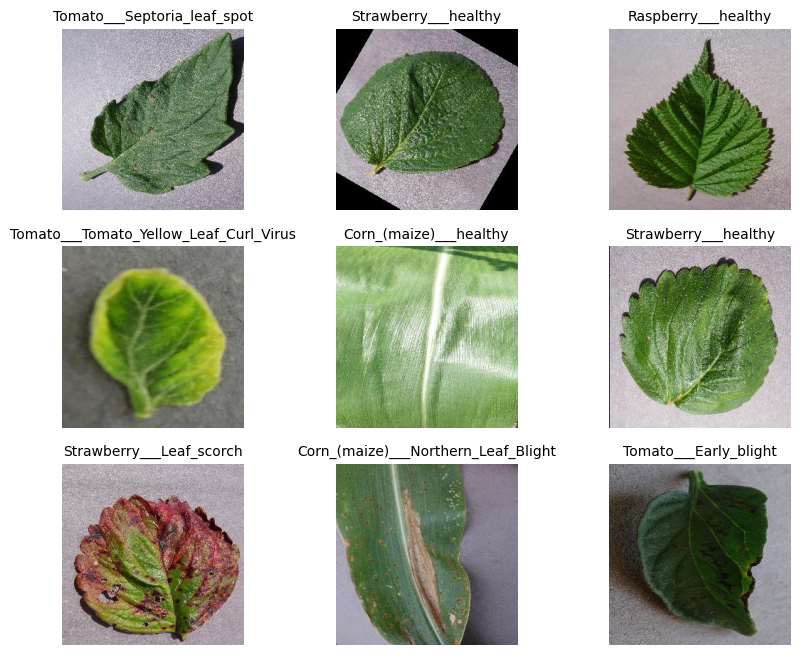

In [9]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (64,64,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')

In [11]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [12]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [13]:
feature_model.summary()

Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 GlobalAveragePooling2D_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 4098249 (15.63 MB)
Trainable params: 1399638 (5.34 MB)
Non-trainable params: 2698611 (10.29 MB)
___

In [14]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, 
                                                 patience=2,
                                                 verbose=1, 
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")

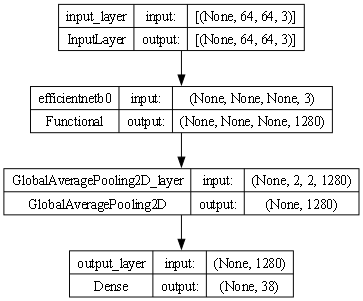

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(feature_model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

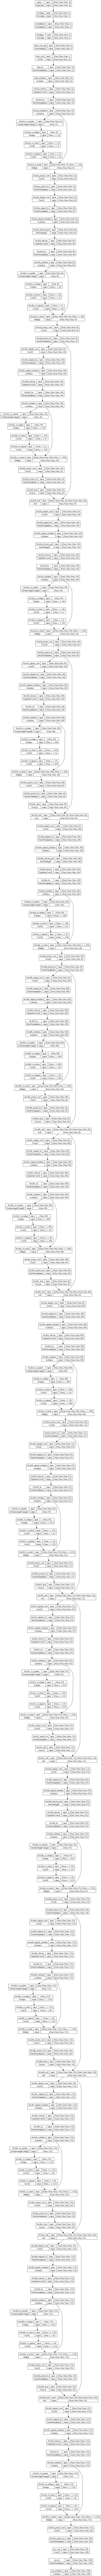

In [17]:
plot_model(base_model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

In [18]:
initial_epochs = 50

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010')])

Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20231218-201145
Epoch 1/50


2197/2197 [==============================] - 211s 93ms/step - loss: 0.4650 - accuracy: 0.8539 - val_loss: 0.2170 - val_accuracy: 0.9297 - lr: 0.0010
Epoch 2/50
2197/2197 [==============================] - 235s 107ms/step - loss: 0.2318 - accuracy: 0.9228 - val_loss: 0.1762 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 3/50
2197/2197 [==============================] - 221s 100ms/step - loss: 0.1737 - accuracy: 0.9419 - val_loss: 0.1458 - val_accuracy: 0.9534 - lr: 0.0010
Epoch 4/50
2197/2197 [==============================] - 217s 99ms/step - loss: 0.1408 - accuracy: 0.9524 - val_loss: 0.1313 - val_accuracy: 0.9596 - lr: 0.0010
Epoch 5/50
2197/2197 [==============================] - 213s 97ms/step - loss: 0.1187 - accuracy: 0.9600 - val_loss: 0.1212 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 6/50
2197/2197 [==============================] - 204s 93ms/step - loss: 0.0988 - accuracy: 0.9660 - val

In [19]:
feature_model.load_weights(checkpoint_path)

In [20]:
feature_model.evaluate(test_data)

550/550 [==============================] - 32s 58ms/step - loss: 0.0613 - accuracy: 0.9825


[0.061303090304136276, 0.9825290441513062]

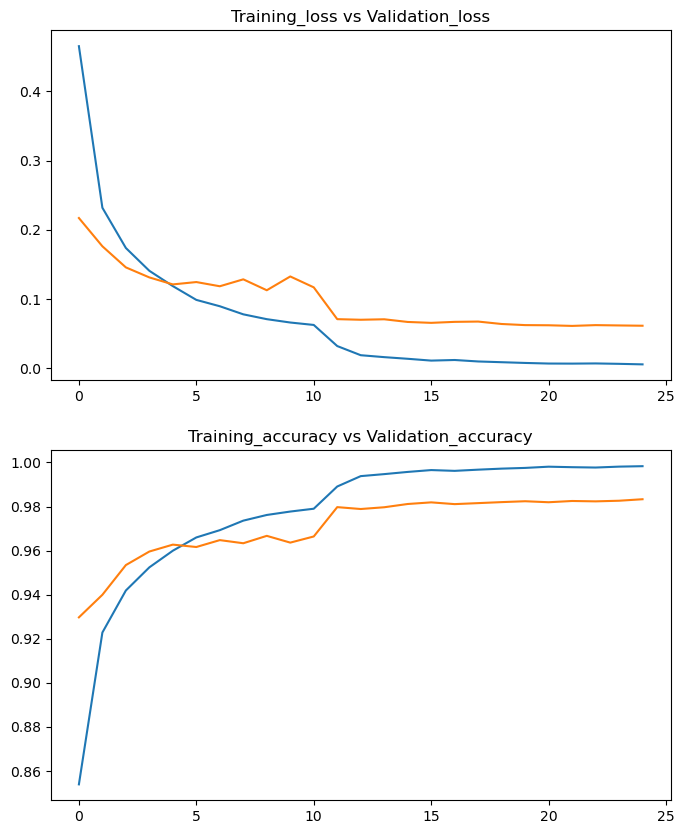

In [21]:
import matplotlib.pyplot as plt

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = history1.epoch

    acc = history.history['accuracy']
    val_acc =history.history['val_accuracy']

    plt.figure(figsize=(8,10))
    plt.subplot(2,1,1)
    plt.plot(epochs,loss)
    plt.plot(epochs,val_loss)
    plt.title('Training_loss vs Validation_loss')

    plt.subplot(2,1,2)
    plt.plot(epochs,acc)
    plt.plot(epochs,val_acc)
    plt.title('Training_accuracy vs Validation_accuracy')
plot_history(history1)

In [22]:
feature_model.save('best_plant_model.h5')

C:\Users\awadh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(64,64))

  return img

Text(0.5, 0.98, '(64, 64, 3)')

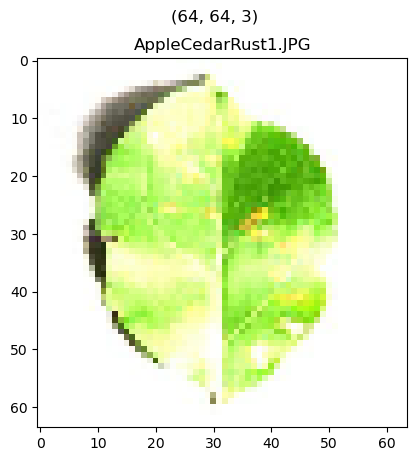

In [27]:
image = load_prep('C:/Users/awadh/Data Science/Leaf Predection/content/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [28]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred

1/1 [==============================] - 2s 2s/step


array([[1.2718333e-11, 2.9568634e-08, 9.9999988e-01, 2.4987879e-15,
        3.6636885e-13, 2.2989121e-14, 7.3807973e-16, 5.8800671e-15,
        3.5464795e-14, 6.9273678e-19, 4.3277563e-16, 3.3606112e-17,
        9.1939512e-19, 4.1391235e-12, 6.4499713e-13, 5.3033482e-08,
        6.2182270e-10, 2.5317934e-08, 4.4365351e-19, 7.4328720e-12,
        2.6796553e-13, 7.3371102e-18, 1.3804384e-11, 6.7616318e-19,
        1.1632077e-20, 4.7875182e-17, 3.4752071e-17, 8.3691209e-17,
        1.2308424e-15, 1.0702608e-21, 4.3523272e-15, 1.1592154e-22,
        5.5351097e-18, 2.2391394e-22, 5.0942926e-14, 1.4108264e-18,
        3.0991774e-17, 5.2669137e-17]], dtype=float32)

In [29]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [30]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  
  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 38ms/step


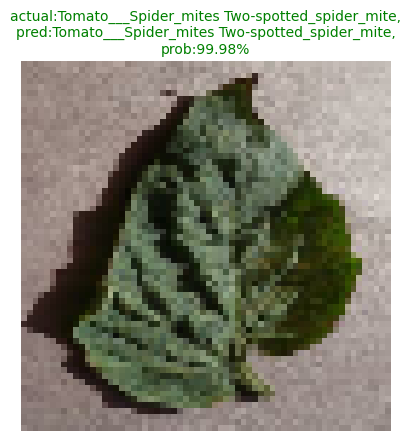

In [31]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 47ms/step


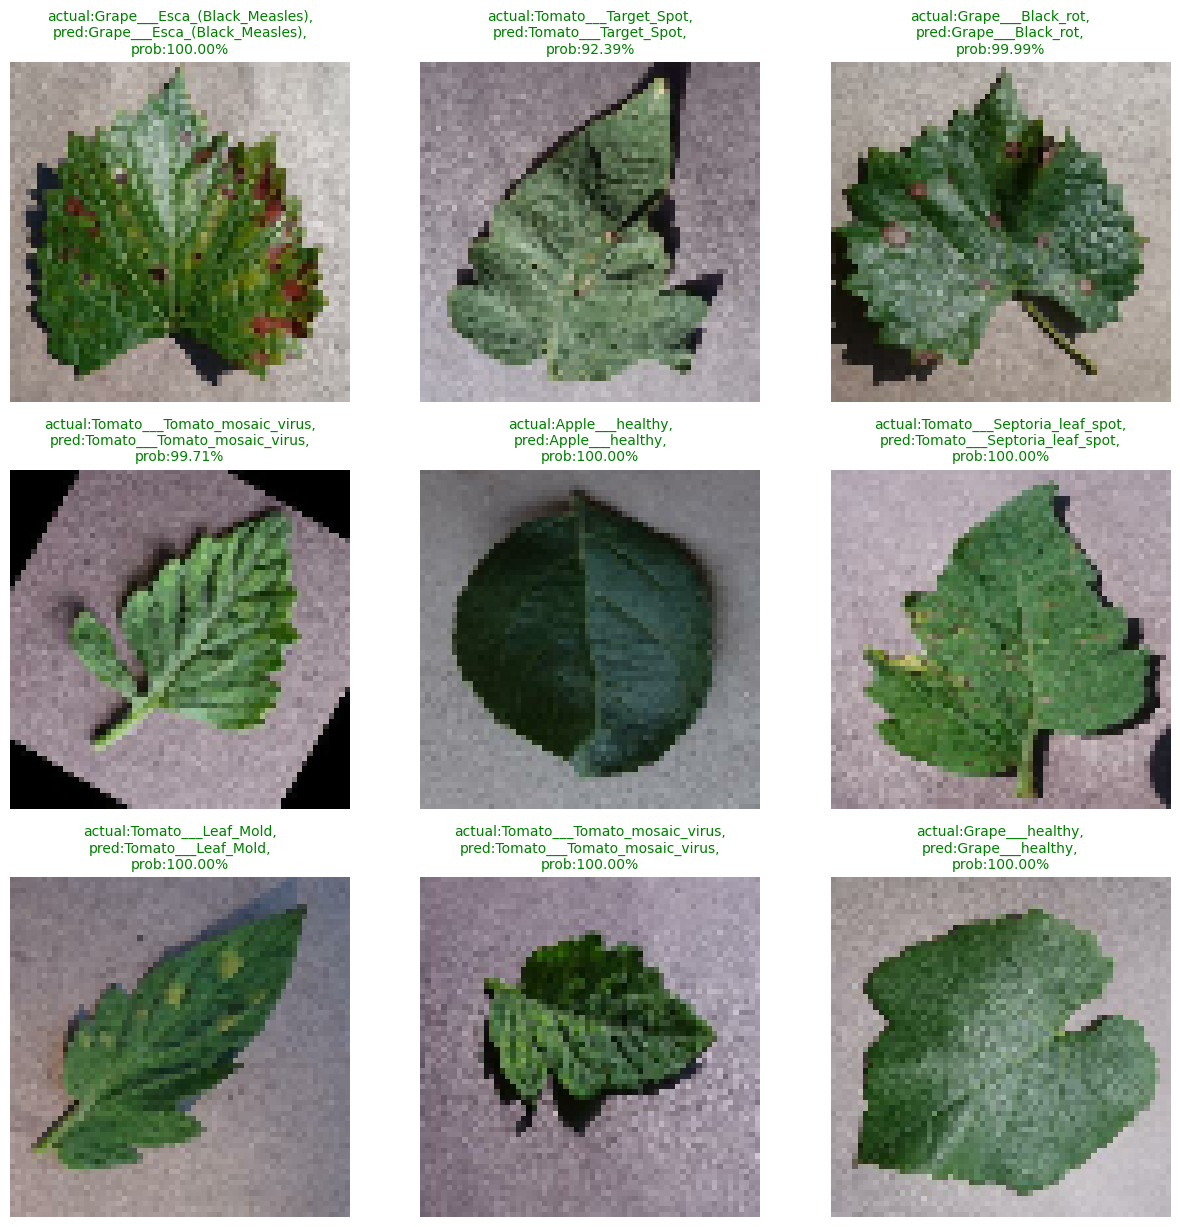

In [32]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 47ms/step


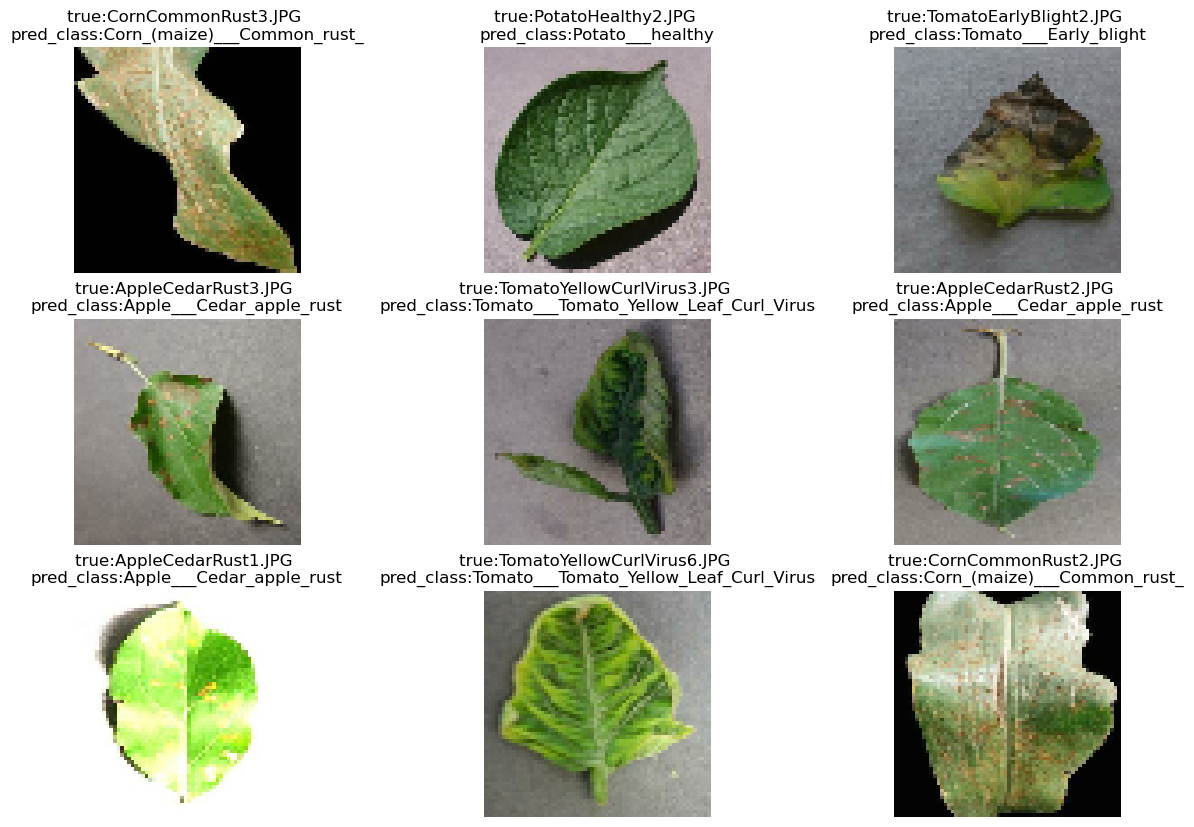

In [33]:
data_dir='C:/Users/awadh/Data Science/Leaf Predection/content/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)
  

In [34]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [35]:
import urllib.request
urllib.request.urlretrieve('https://hortnews.extension.iastate.edu/files/resize/article/images/angular_leaf_spot_1_0-500x516.jpg')

('C:\\Users\\awadh\\AppData\\Local\\Temp\\tmpapnlbtny',
 <http.client.HTTPMessage at 0x18feb3bd110>)

1/1 [==============================] - 0s 47ms/step


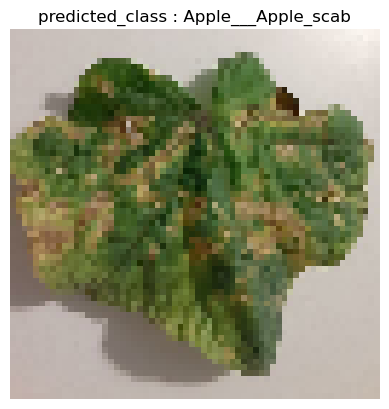

In [36]:
predict_img('C:\\Users\\awadh\\AppData\\Local\\Temp\\tmpl49mkmvn')